<a href="https://colab.research.google.com/github/Molly-Abisage/N.H-HYPOTHYROID/blob/main/WEEK_8_IP_THYROID_MollyAbisage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIROBI HOSPITAL HYPOTHYROIDISM TEST


**OVERVIEW**

Nairobi hospital conducted a clinical camp to test for hypothyroidism amondst thyroid patients. we are using this data to accomplish the following

build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

part 1: build decision trees

part 2: SVM

**QUESTION DEFINITION**

predict if the symptoms of a patient indicates that the patient has hypothyroid.

**METRICS OF SUCCESS**

We are diagnosing if the variables we have indicate that the patient has hypothyroidism. a high accuracy is what we expect , not so accurate model means wrong diagnosing and would give rise to wrong medication which can cost lifes.

**CONTEXT**
column description

status - tells us if the patient is negative or has hypothyroidism

age - how old is the patient

sex - if the patient is male or female

on_thyroxine - True /False

query_on_thyroxine

on_antithyroid_medication - if the patient is on medication

thyroid_surgery - if the patient has had thyroid surgery

query_hypothyroid

query_hyperthyroid

pregnant - if the patient is pregnant,true or false

sick - if the patient is sick,

tumor - if the patient has tumor

lithium

goitre - if the patient has goitre

TSH_measured - if a blood test has been done to measure the hormone

TSH - thyroid stimulating hormone , tells the thyroid to release thyroid hormone to the blood.

T3_measured - if T3 measurement has been done

T3 - triiodothyronine , this is a thyroid hormone produced in the thyroid glands

TT4_measured

TT4 - thyroxine , the principla hormone from the thyroid gland.

T4U_measured - true / false

T4U - thyroid hormone produced in the thyroid glands(thyroxine)/levothyroxine

FTI_measured - if FTI has been measured

FTI - free thyroxine index, it is considered more indicator of thyroid, obtained by nultiplying Total T4 and T3 uptake.

TBG_measured - if TBG has been measured.

TBG - thyroid binding globulin, binds thyroid hormones in circulation

**EXPERIMENTAL DESIGN**

Recording the Experimental Design;-  
Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

Load data and preview preliminary characteristics
Data Cleaning (check for and deal with outliers, anomalies and missing data)
Exploratory Analysis
Implementing the Solution
Challenging the Solution
Follow Up Questions

# LOAD AND TIDYING THE DATASET

In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [111]:
hypothy = pd.read_csv('/content/hypothyroid.csv')
# previewing a sample of the data

hypothy.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2713,negative,47,F,f,f,f,f,f,t,f,f,f,f,f,y,0.15,y,4.30,y,189,y,1.07,y,176,n,?
1388,negative,70,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.70,y,213,y,1,y,213,n,?
632,negative,69,F,t,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.20,y,60,y,1.11,y,54,n,?
2778,negative,52,M,f,f,f,f,f,f,f,f,f,f,f,y,1.10,y,2.70,y,159,y,1.19,y,134,n,?
2715,negative,?,F,t,f,f,f,f,f,f,f,f,f,f,y,2.10,y,4.50,y,208,y,1.76,y,118,n,?


In [112]:
#preview the head
hypothy.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [113]:
# checking the total number of records and columns

hypothy.shape

(3163, 26)

In [114]:
# checking datatypes of each attribute and previewing the existense of null values

hypothy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

the columns have 'object' as datatype, we change this in cleaning stage

In [115]:
# checking for unique values in each column

hypothy.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [116]:
#we preview the unique features in each column

# previewing the unique values of each of our columns

columns = hypothy.columns.to_list()

for column in columns:
    print("\n")
    print("Column Name:", column)
    print(hypothy[column].unique())



Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

In [117]:
#check for null values
hypothy.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

there are no missinng values in the dataset

In [118]:
#the dataset has columns with '?' on the records, lets check the total number of '?' on the columns

print(hypothy[hypothy == '?'].count())

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


age = 446   
TSH = 468  
T3 = 695   
TBG = 2,903
TBG has 75% of the records in the column being '?' therefore we drop this column since its computation wil bring about errors.
 The other records are assumed to be null and we can drop them also or replace them.

In [119]:
#Dropping columns TBG and TBG_measured since they dont have valuable records to work with

hypothy.drop(['TBG', 'TBG_measured'],axis=1, inplace=True)

In [120]:
hypothy = hypothy.replace(['?'], np.nan) 
hypothy.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
3087,negative,79,M,f,f,f,f,f,f,f,f,f,f,f,n,NaN,y,3.10,y,162,y,0.78,y,209
1158,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.60,y,123,y,0.92,y,134
722,negative,61,M,f,f,f,f,f,f,f,f,f,f,f,y,0.50,y,1.30,y,93,y,0.84,y,111
55,hypothyroid,41,F,f,f,f,f,f,f,f,f,f,f,f,n,NaN,n,NaN,y,44,y,0.90,y,49
37,hypothyroid,40,F,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.30,y,6.60,y,0.93,y,7


In [121]:
# dropping null values on specific columns

hypothy = hypothy[hypothy['age'].notna()]
hypothy = hypothy[hypothy['sex'].notna()]
hypothy = hypothy[hypothy['TSH'].notna()]
hypothy = hypothy[hypothy['T4U'].notna()]
hypothy = hypothy[hypothy['TT4'].notna()]
hypothy = hypothy[hypothy['FTI'].notna()]
hypothy = hypothy[hypothy['T3'].notna()]

In [122]:
# confirming that there are no more nulls

hypothy.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [123]:
#lets check for duplicates

hypothy.duplicated().value_counts()


False    1946
True       54
dtype: int64

In [124]:
#dropping the duplicate rows
hypothy.drop_duplicates(inplace = True)

In [125]:
#checking if the duplicates have been dropped
hypothy.duplicated().sum()

0

In [126]:
# first converting categorical variables to category

hypothy['status'] = hypothy['status'].astype('category')
hypothy['sex'] = hypothy['sex'].astype('category')
hypothy['on_thyroxine'] = hypothy['on_thyroxine'].astype('category')
hypothy['query_on_thyroxine'] = hypothy['query_on_thyroxine'].astype('category')
hypothy['on_antithyroid_medication'] = hypothy['on_antithyroid_medication'].astype('category')
hypothy['thyroid_surgery'] = hypothy['thyroid_surgery'].astype('category')
hypothy['query_hypothyroid'] = hypothy['query_hypothyroid'].astype('category')

hypothy['query_hyperthyroid'] = hypothy['query_hyperthyroid'].astype('category')
hypothy['pregnant'] = hypothy['pregnant'].astype('category')
hypothy['sick'] = hypothy['sick'].astype('category')
hypothy['tumor'] = hypothy['tumor'].astype('category')
hypothy['lithium'] = hypothy['lithium'].astype('category')
hypothy['goitre'] = hypothy['goitre'].astype('category')
hypothy['TSH_measured'] = hypothy['TSH_measured'].astype('category')

hypothy['T3_measured'] = hypothy['T3_measured'].astype('category')
hypothy['TT4_measured'] = hypothy['TT4_measured'].astype('category')
hypothy['T4U_measured'] = hypothy['T4U_measured'].astype('category')
hypothy['FTI_measured'] = hypothy['FTI_measured'].astype('category')

hypothy.dtypes

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
dtype: object

In [127]:
# let's convert numerical variables to numerical datatypes and replace question marks nan
##‘coerce’ converts invalid parsing in this case '?' to NaN.

hypothy['age'] = pd.to_numeric(hypothy['age'], errors = 'coerce') 
hypothy['TSH'] = pd.to_numeric(hypothy['TSH'], errors = 'coerce')
hypothy['T3'] = pd.to_numeric(hypothy['T3'], errors = 'coerce')
hypothy['TT4'] = pd.to_numeric(hypothy['TT4'], errors = 'coerce')
hypothy['T4U'] = pd.to_numeric(hypothy['T4U'], errors = 'coerce')
hypothy['FTI'] = pd.to_numeric(hypothy['FTI'], errors = 'coerce')

print(hypothy.dtypes)

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object


In [128]:
hypothy.shape

(1946, 24)

# EXPLORATORY DATA ANALYSIS

**UNIVARIATE ANALYSIS**

In [129]:
#lets preview our clean dataset

df1 = hypothy
df1.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [130]:
# checking the statistical summary of the cleaned data
df1.describe()

,age,TSH,T3,TT4,T4U,FTI
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,53.584789,5.957256,1.918911,107.246300,0.987744,110.140956
std,19.258577,24.676600,0.955347,44.081825,0.230405,40.324629
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,1.300000,82.000000,0.852500,90.000000
50%,57.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,2.200000,2.300000,125.000000,1.070000,126.000000
max,98.000000,530.000000,9.800000,450.000000,2.030000,450.000000


negative       1833
hypothyroid     113
Name: status, dtype: int64


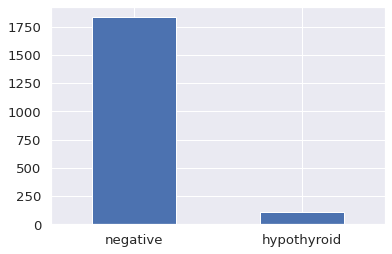

In [131]:
#counting the number of people who have tested negative and those who are hypothyroid.
df1.status.value_counts().plot(kind = 'bar', rot = 0)
print(df1.status.value_counts())

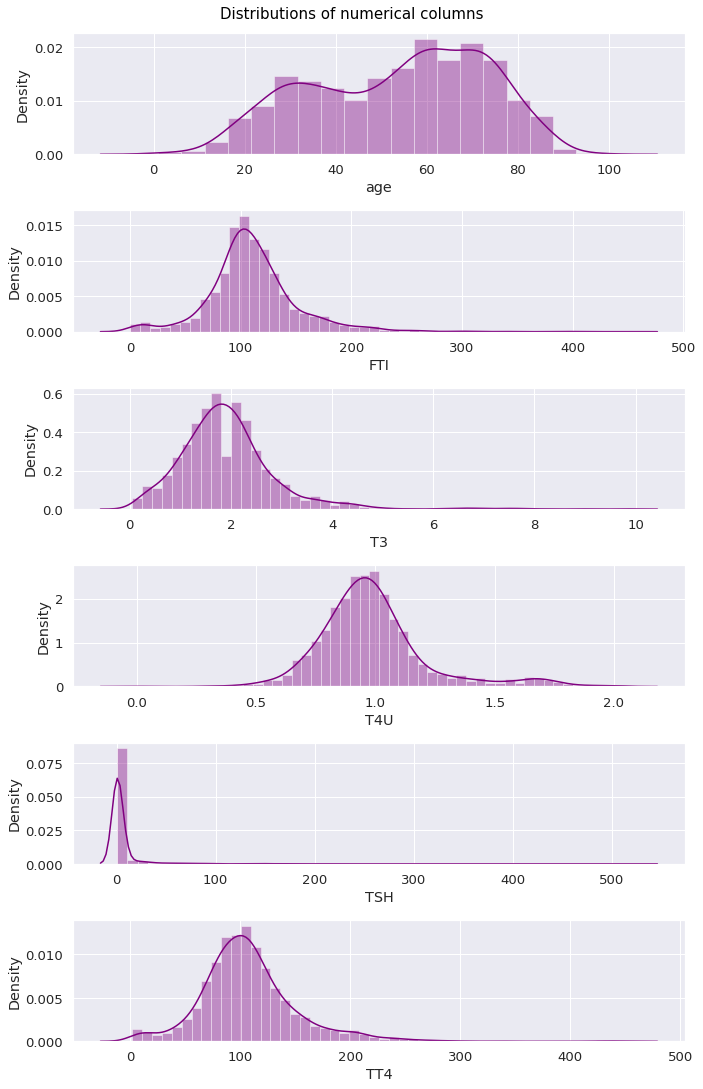

In [132]:
#lets check the distribution of numerical columns
dist_columns = ['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(dist_columns), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df1, dist_columns):
 sns.distplot(df1[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

comments:  age shows a bimodal distribution
FTI and T3 shoes a bit or more than trimodal distribution with a thin curve and some skewness to the right
T4U is a shows some bimodal distribution with majority of the data being normally distributed
TSH is heavily skewed to the right
TT4 is normally distributed

**BIVARIATE ANALYSIS**

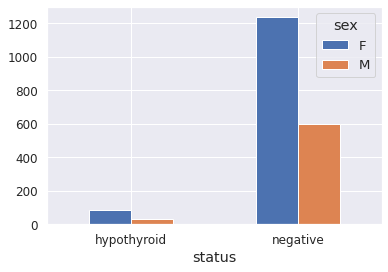

In [133]:
#barchart comparing sex and status
pd.crosstab(df1['status'], df1['sex']).plot(kind='bar', rot=0, fontsize=12)

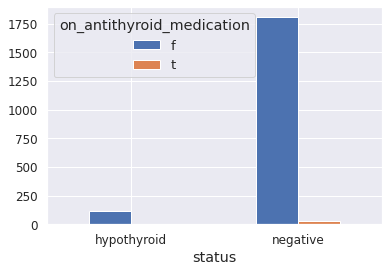

In [134]:
pd.crosstab(df1['status'], df1['on_antithyroid_medication']).plot(kind='bar', rot=0, fontsize=12)
# a few males who test negative are on antithyroid medication

In [135]:
# splitting age into  age groups to get a deeper understanding of our data.
conditions = [
    ((df1.age >= 0) & (df1.age <= 9)),
    ((df1.age >= 10) & (df1.age <= 19)),
    ((df1.age >= 20) & (df1.age <= 29)),
    ((df1.age >= 30) & (df1.age <= 39)),
    ((df1.age >= 40) & (df1.age <= 49)),
    ((df1.age >= 50) & (df1.age <= 59)),
    ((df1.age >= 60) & (df1.age <= 69)),
    ((df1.age >= 70) & (df1.age <= 79)),
    ((df1.age >= 80) & (df1.age <= 89)),
    ((df1.age >= 90) & (df1.age <= 98))
]

groups = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9','G10']
#create a column that stores our new data
df1['age'] = np.select(conditions, groups)


[Text(0, 0.5, 'Status'),
 Text(0.5, 1.0, 'relation between the age and hypothyroidism')]

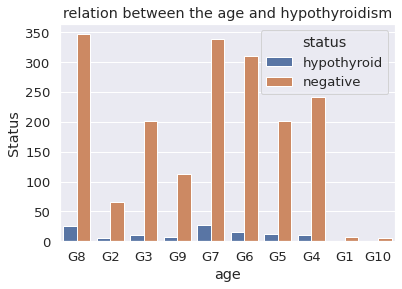

In [136]:

#plot a graph to show the distribution of hypothyroidism across different ages.
age = sns.countplot('age', hue = 'status', data = df1)
age.set(title = "relation between the age and hypothyroidism", ylabel = "Status")

comment:we observe that more female have hypothyroid compared to male
we also see that more female tested negative. thia is expected since more females took the test


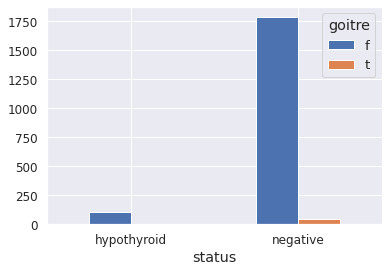

In [137]:
pd.crosstab(df1['status'], df1['goitre']).plot(kind='bar', rot=0, fontsize=12)

# a few patients who tested negative have goitre

 comments:the numerical variables shows moderate to strong positive and negative correlation among each other. some have week negative correlation e.g T4U to FTI and age to TT4. let's explore this further by plotting pair plots below.

**MULTIVARIATE ANALYSIS**

In [138]:
#checking the correlation
corr = df1.corr()
corr

,TSH,T3,TT4,T4U,FTI
TSH,1.000000,-0.188139,-0.327163,0.058965,-0.378382
T3,-0.188139,1.000000,0.580542,0.499923,0.316124
TT4,-0.327163,0.580542,1.000000,0.423904,0.802290
T4U,0.058965,0.499923,0.423904,1.000000,-0.148000
FTI,-0.378382,0.316124,0.802290,-0.148000,1.000000


the relation to itself is 1, has expected. TBG,T4U,TT4,T3 have an inverse relation to age

# MODELLING

**DATA PREPROCESSING**

In [139]:
# since most of the categorical columns are in string format,
# there is need to encode the data to numerical before we begin modeling
# we will use label encoding (.cat.codes)

df1['status'] = df1['status'].cat.codes
df1['sex'] = df1['sex'].cat.codes
df1['on_thyroxine'] = df1['on_thyroxine'].cat.codes
df1['query_on_thyroxine'] = df1['query_on_thyroxine'].cat.codes
df1['on_antithyroid_medication'] = df1['on_antithyroid_medication'].cat.codes
df1['thyroid_surgery'] = df1['thyroid_surgery'].cat.codes
df1['query_hypothyroid'] = df1['query_hypothyroid'].cat.codes
df1['query_hyperthyroid'] = df1['query_hyperthyroid'].cat.codes
df1['pregnant'] = df1['pregnant'].cat.codes

df1['sick'] = df1['sick'].cat.codes
df1['tumor'] = df1['tumor'].cat.codes
df1['lithium'] = df1['lithium'].cat.codes
df1['goitre'] = df1['goitre'].cat.codes
df1['TSH_measured'] = df1['TSH_measured'].cat.codes
df1['T3_measured'] = df1['T3_measured'].cat.codes
df1['TT4_measured'] = df1['TT4_measured'].cat.codes
df1['T4U_measured'] = df1['T4U_measured'].cat.codes
df1['FTI_measured'] = df1['FTI_measured'].cat.codes

In [140]:
# checking for data types. 
df1.dtypes

status                          int8
age                           object
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                          float64
T3_measured                     int8
T3                           float64
TT4_measured                    int8
TT4                          float64
T4U_measured                    int8
T4U                          float64
FTI_measured                    int8
FTI                          float64
dtype: object

In [141]:
# converting int8 to int64

df1['status'] = df1['status'].astype('int64')
df1['sex'] = df1['sex'].astype('int64')
df1['on_thyroxine'] = df1['on_thyroxine'].astype('int64')
df1['query_on_thyroxine'] = df1['query_on_thyroxine'].astype('int64')
df1['on_antithyroid_medication'] = df1['on_antithyroid_medication'].astype('int64')
df1['thyroid_surgery'] = df1['thyroid_surgery'].astype('int64')
df1['query_hypothyroid'] = df1['query_hypothyroid'].astype('int64')
df1['query_hyperthyroid'] = df1['query_hyperthyroid'].astype('int64')
df1['pregnant'] = df1['pregnant'].astype('int64')

df1['sick'] = df1['sick'].astype('int64')
df1['tumor'] = df1['tumor'].astype('int64')
df1['lithium'] = df1['lithium'].astype('int64')
df1['goitre'] = df1['goitre'].astype('int64')
df1['TSH_measured'] = df1['TSH_measured'].astype('int64')
df1['T3_measured'] = df1['T3_measured'].astype('int64')
df1['TT4_measured'] = df1['TT4_measured'].astype('int64')
df1['T4U_measured'] = df1['T4U_measured'].astype('int64')
df1['FTI_measured'] = df1['FTI_measured'].astype('int64')
df1.dtypes

status                         int64
age                           object
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
dtype: object

In [142]:
df1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,G8,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,0,G2,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,0,G3,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,0,G3,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,0,G8,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


In [143]:
df1.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

**RANDOM FORESTS**

In [144]:
# splitting data into features and label

features = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
        'TSH', 'T3', 'TT4',
        'T4U', 'FTI']
X = df1[features].values
y = df1['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =100



In [145]:
#we train our model using 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#checking the shape our our test data
print(X.shape)
print(y.shape)

(1946, 17)
(1946,)


In [146]:
##RANDOM FOREST CLASSIFIER
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)

# Fitting the model
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred = forest.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
182       1          1
337       1          1
241       1          1
296       0          0
13        1          1
           Actual   Predicted
count  584.000000  584.000000
mean     0.938356    0.940068
std      0.240714    0.237563
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [148]:
# Assessing model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Mean Absolute Error: 0.011986301369863013
Mean Squared Error: 0.011986301369863013
Root Mean Squared Error: 0.10948196824072452
Accuracy: 0.988013698630137
[[ 32   4]
 [  3 545]]


-we observe that the model is 98% accurate

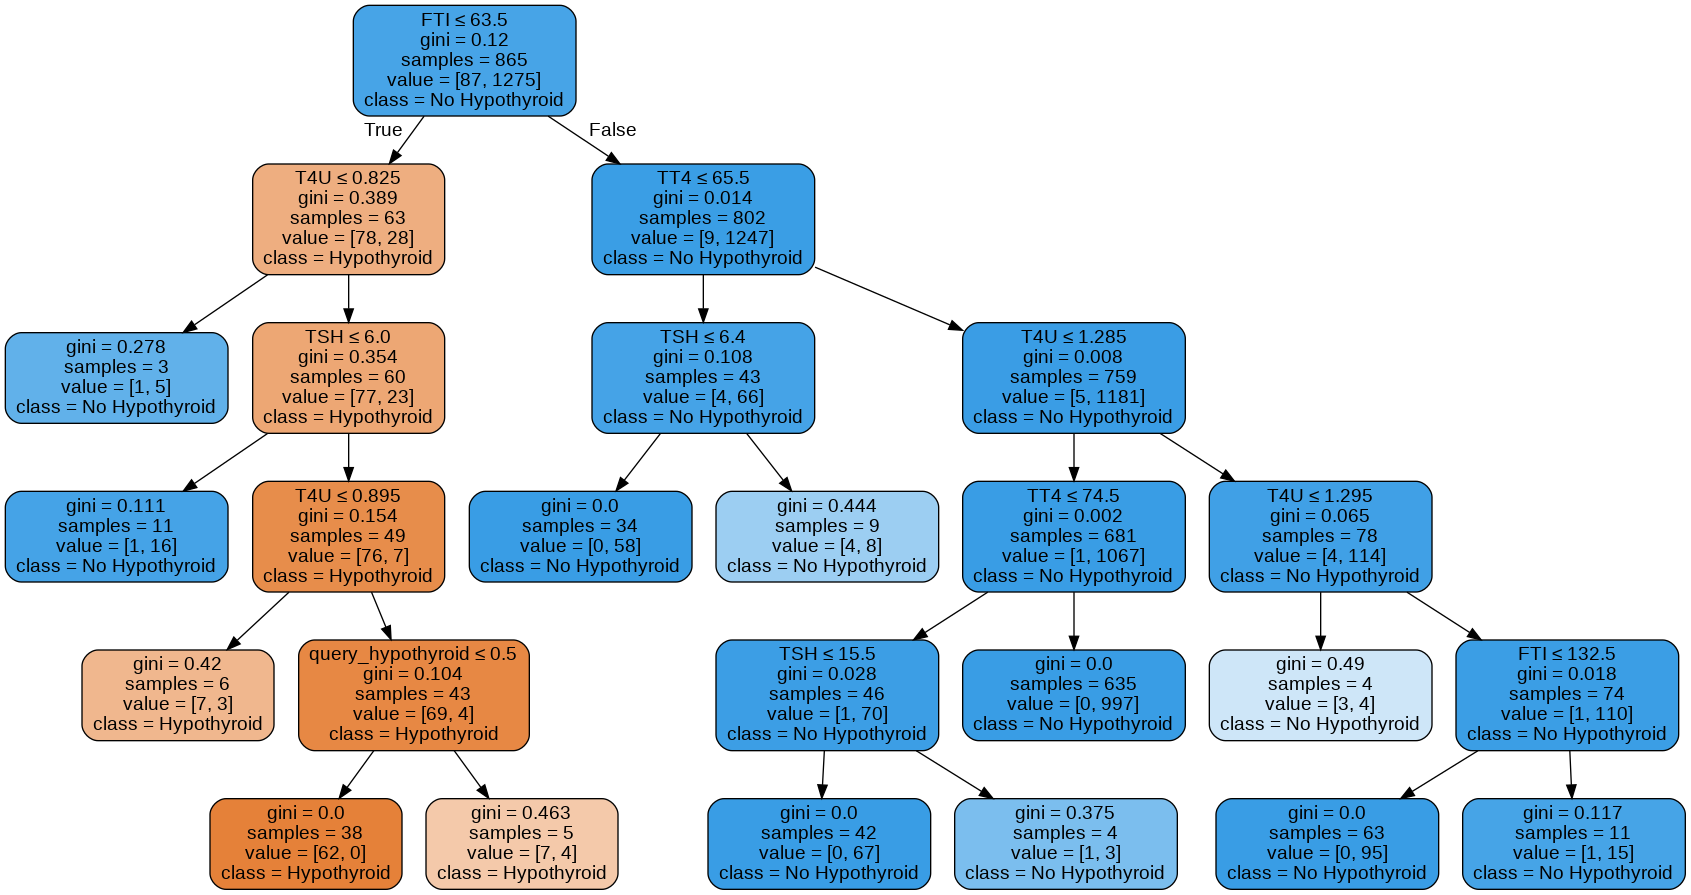

In [150]:
# Visualizing the model at random tree number 50

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picking the specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = my_cols, class_names=['Hypothyroid', 'No Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())

In [154]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred.flatten()})

# previewing our head
compare.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1


In [155]:
# Checking the important features from the model

importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]

# Sorting the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.75
Variable: TSH                  Importance: 0.17
Variable: T4U                  Importance: 0.06
Variable: query_hypothyroid    Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: TT4                  Importance: 0.0


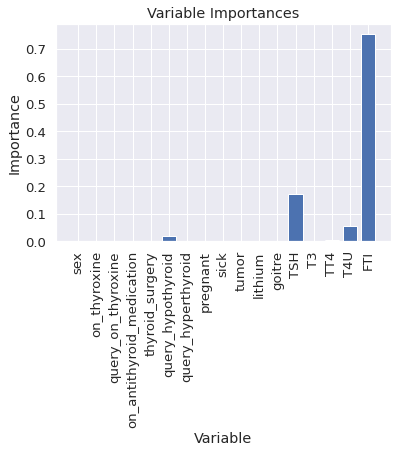

In [156]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


FTI, TSH, TT4, and T4U are mostly used to predict if a patient has a hypothyroid condition

**ADA BOOST CLASSIFIER**

In [170]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                          n_estimators=300, random_state=0)

# fit the model
ada_boost = ada_boost.fit(X_train, y_train)

# make prediction
y_pred_ada = ada_boost.predict(X_test)

In [171]:
# check prediction data

comparison_frame_ada = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})
print(comparison_frame_ada.sample(n=5))
print(comparison_frame_ada.describe())

     Actual  Predicted
76        1          1
152       1          1
132       0          0
219       1          1
71        0          0
           Actual   Predicted
count  390.000000  390.000000
mean     0.928205    0.923077
std      0.258480    0.266812
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


-OUR prediction has a small margin difference with the actual, the model is doing good.

In [173]:
# Assesing the accuracy

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)

# fit the model
ada_boost = ada_boost.fit(X_train, y_train)

# make prediction
y_pred_ada = ada_boost.predict(X_test)

# Assessing new ada boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Mean Absolute Error: 0.005128205128205128
Mean Squared Error: 0.005128205128205128
Root Mean Squared Error: 0.07161148740394328
Accuracy: 0.9948717948717949


Ada boost gives an improved accuracy score of 99%

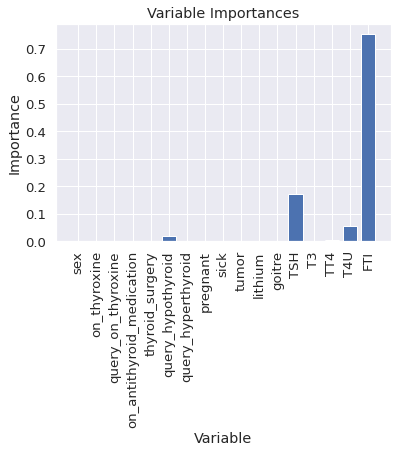

In [182]:
#feature importance in ada boosting

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, my_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**GRADIENT BOOSTING**

In [177]:
# lets first create the gradient boosting classifier
target_number_of_trees = 200
# train the model
gradient = gradient.fit(X_train, y_train)

# make prediction
y_pred_gbr = gradient.predict(X_test)

 from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2)
# fitting to training data
gradient = gradient.fit(X_train, y_train)
# making predictions
y_pred_gbr = gradient.predict(X_test)


In [179]:
# comparing actual values to predicted values
gb_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred_gbr.flatten()})

# previewing our summary statistics
gb_compare.describe()

,Actual,Predicted
count,390.000000,390.000000
mean,0.928205,0.928573
std,0.258480,0.234288
min,0.000000,-0.237003
25%,1.000000,1.001104
50%,1.000000,1.001104
75%,1.000000,1.001104
max,1.000000,1.047921


-The count of actual and predicted is same i.e model is 100% accurate.the difference in actual and predicted values is smaller. our model is good.Next step is to try and adjust the hyperparameters and see if there might be any change in accuracy

In [180]:
# hyperparameter adjusting

target_number_of_trees = 50
gradient = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.5, max_depth=4)
gradient = gradient.fit(X_train, y_train)
y_pred_gbr = gradient.predict(X_test)

# Assessing new gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.002564102564102564
Mean Squared Error: 0.002564102564102564
Root Mean Squared Error: 0.05063696835418333
Accuracy: 0.9974358974358974


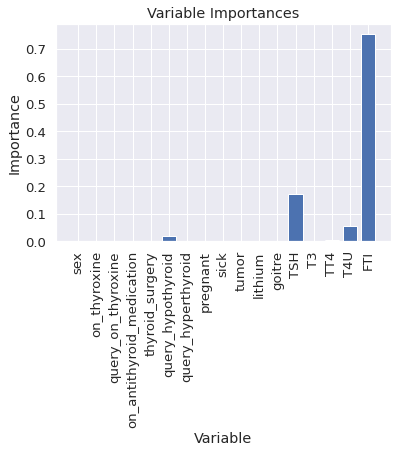

In [181]:
# feature importance in gradient boost

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, my_cols, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# comparing accuracy scores of all three models

print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Ada Boost Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("Gradient Boost Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

**SUPPORT VECTOR MACHINES SVM**

**LINEAR KERNELS**

In [187]:
#splitting our dataset to dependent and independent variables
X = df1[['TSH', 'FTI', 'T4U']].values
y = df1['status'].values
#checking the shape of our dataset
print(X.shape)
print(y.shape)

(1946, 3)
(1946,)


In [190]:
# we now split our data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [191]:
# we build our model
#

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data to our testing set
linear.fit(X_train, y_train)

# making predictions using our model
y_pred = linear.predict(X_test)

In [192]:
#checking the accuracy of our data
print("Linear kernel score:", metrics.accuracy_score(y_test, y_pred))

Linear kernel score: 0.982051282051282


-our model has an accuracy of 98%, this is good

POLYNOMIAL KERNEL

In [194]:
# Build the model AND train using the training set

polyclassifier = SVC(kernel='poly',degree=3,gamma=2**-5)

polyclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [195]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation

print('Accuracy: ', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Accuracy:  0.9846153846153847
Mean Absolute Error: 0.015384615384615385
Mean Squared Error: 0.015384615384615385
Root Mean Squared Error: 0.12403473458920845


-the model is slightly accurate than the previous one from 98.2% to 98.4%

RADIAL BASIS FUNCTION

In [197]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [200]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))


Accuracy:  0.9846153846153847
Mean Absolute Error: 0.015384615384615385
Mean Squared Error: 0.015384615384615385
Root Mean Squared Error: 0.12403473458920845


In [202]:
# LETS IMPORT GRIDSEARCH TO USE HERE
from sklearn.model_selection import GridSearchCV
#define C and gamma range

C_range=list(range(1,10))
gamma_range = [0.0001, 0.001, 0.01, 1, 10]

# fit the C and gamma range on parameter grid
parameter_grid = dict(gamma=gamma_range, C=C_range)

#  find the best parameters and best model score
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the grid model
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [205]:
# fit model with above parameters

rbfclassifier = SVC(kernel='rbf', C = 5, gamma = 0.001)

rbfclassifier.fit(X_train, y_train)

y_pred_rbf2 = rbfclassifier.predict(X_test)

# Model Evaluation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf2)))
print('Accuracy Score :', accuracy_score(y_test,y_pred_rbf2))

Mean Absolute Error: 0.007692307692307693
Mean Squared Error: 0.007692307692307693
Root Mean Squared Error: 0.08770580193070292
Accuracy Score : 0.9923076923076923


In [206]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
y_pred = rbf.predict(X_test)

In [207]:
print("rbf kernel score:", metrics.accuracy_score(y_test, y_pred))

rbf kernel score: 0.9333333333333333


our rbf kernel is 0.9805, this is a good accuracy.the rbf is has an acccuracy similsr to that of polynomial.. our model generally did gOOd.

SIGMOID KERNEL

In [208]:
# finally doing it with the sigmoid kernel
sig = SVC(kernel = 'sigmoid', gamma = 'auto')

# training the model
sig.fit(X_train, y_train)

# making prediction
sig_y_pred = sig.predict(X_test)

In [209]:

# checking the accuracy of our model
print("Sigmoid kernel score:", metrics.accuracy_score(y_test, sig_y_pred))

Sigmoid kernel score: 0.9153846153846154


our sigmoid accuracy score is 0.92, this is the lowest compared to the other models above

CHALLENGING SOLUTION

In conclusion, our models did well, our metric of success was met, the accuracy of each model was above 92%.

the model would have done better if the dataset did not have so many missing values, the data too was biased, the ratio of male to female was not 50,50

the people who tested positive for hypothyroidism was also too small,